In [5]:
# Import modules
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import os


def work_space(path):
    while True:
        if os.path.split(path)[1] != "Phys117":
            path = os.path.split(path)[0]
        else:
            return path.replace("\\", "/")

work_dir = work_space(os.getcwd())
data_path = work_dir + "/Markus/Hub/VariableData/"
folders = os.listdir(data_path)
data_files = [data_path + data_file for data_file in folders]
stuffs = ["electron", "jet", "MET", "muon", "photon", "tau"]
data_variables = ["met", "HT", "stuff_amount", "ptmax", "phi_diff"]
file_amounts = [2, 18, 3]


def unpacker(folder_data, new_folder_data):
    for nested_list in folder_data:
        if type(nested_list) == list:
            unpacker(nested_list, new_folder_data)
        else:
            new_folder_data.append(nested_list)
    folder_data = new_folder_data
    return folder_data


def data_binner(data, binsize):
    data = unpacker(data, [])

    if len(data) == 0:
        x = [bin * binsize for bin in range(200)]
        y = [0 for bin in range(200)]
        return x, y

    max_value = np.max(data)
    bins = int(np.round(max_value / binsize))
    bins = np.arange(0, bins)
    data = np.array(data)
    x, y = [], []

    for bin in range(len(bins)):
        temp = data
        temp = temp[temp <= (bin + 1/2)*binsize]
        temp = temp[(bin - 1/2)*binsize < temp]
        if len(temp) != 0:
            y.append(len(temp))
            x.append(bin*binsize)

    y = y/np.sum(y)

    return x, y


def plot_filter(interval_data, filter_strength):
    interval_data = sorted(interval_data)
    cutoff = round((len(interval_data) * filter_strength))
    interval_data = interval_data[:cutoff]
    x_min = np.min(interval_data)
    x_max = np.max(interval_data)
    extra = (x_max - x_min) / 10
    return [x_min - extra, x_max + extra]


def sampler(output_dataframe, output_filenames, file_amounts, combine_data):
    from random import sample

    output_dataframe = [[(dataframe, filename) for dataframe, filename in zip(dataframes, filenames)] for dataframes, filenames in zip(output_dataframe, output_filenames)]
    samples = [sample(dataframes, file_amount) for dataframes, file_amount in zip(output_dataframe, file_amounts)]

    if combine_data:
        output_dataframe = [pd.concat([sample[0] for sample in dataframes]) for dataframes in samples]
        labels = folders
    else:
        output_dataframe = [sample[0] for dataframes in samples for sample in dataframes]
        labels = [sample[1] for dataframes in samples for sample in dataframes]
    
    output_dataframe = unpacker(output_dataframe, [])
    lables = unpacker(labels, [])
        

    return output_dataframe, labels


def plotter(data_variables, output_dataframe, output_filenames, filter_strengths, binsizes):

    for variable_index, variable in enumerate(data_variables):
        fig = plt.figure()
        style = "seaborn-darkgrid"
        plt.style.use(style)
        title = variable + " Distribution"
        fig.suptitle(title)
        plt.xlabel(variable)
        plt.ylabel("frequency")

        binsize = binsizes[variable_index] if type(binsizes) == list else binsizes
        filter_strength = filter_strengths[variable_index] if type(filter_strengths) == list else filter_strengths
        interval = np.concatenate([dataframe[variable] for dataframe in output_dataframe])
        plt.xlim(plot_filter(interval, filter_strength))

        for dataframe, label in zip(output_dataframe, output_filenames):
            print(dataframe)
            raw_data = dataframe[variable]
            bins, counts = data_binner(raw_data, binsize)
            plt.plot(bins, counts, label = label)
        
        plt.legend(prop = {'size': 8})
        plt.show()

In [6]:
from FilesFunc import files
folder_list, filename_list = files(data_path, folders, file_amounts)


foldered_dataframes = [[pd.read_csv(data_file).drop("Unnamed: 0", axis = 1) for data_file in folder_files] for folder_files in folder_list]

In [7]:
data_sample, labels = sampler(foldered_dataframes, filename_list, file_amounts = [0, 18, 3], combine_data = False)

         met       HT  stuff_amount    ptmax  phi_diff
0     605.32  4957.84             7  1997.22  0.714593
1     348.13  7920.83             9  2558.78  2.457185
2     505.24  7811.58             7  2415.97  0.708593
3      64.54  4889.93             6  2205.59  0.227000
4      56.21  6333.05            11  2473.51  2.013593
...      ...      ...           ...      ...       ...
9995  570.84  7533.66             9  2906.29  0.110000
9996  632.91  7784.51             5  3253.94  2.097000
9997  456.51  8206.86             9  2718.84  3.127593
9998  184.21  7302.11             5  3488.34  3.123000
9999  301.96  7912.92            10  3369.74  0.556407

[10000 rows x 5 columns]
          met       HT  stuff_amount    ptmax  phi_diff
0       50.98  7640.48             7  2807.84  1.486593
1      865.63  8149.02            10  2400.83  0.373593
2      602.33  6215.16             4  2424.04  0.386593
3     2428.21  7018.60            10  2428.21  0.000000
4      198.32  3317.23            

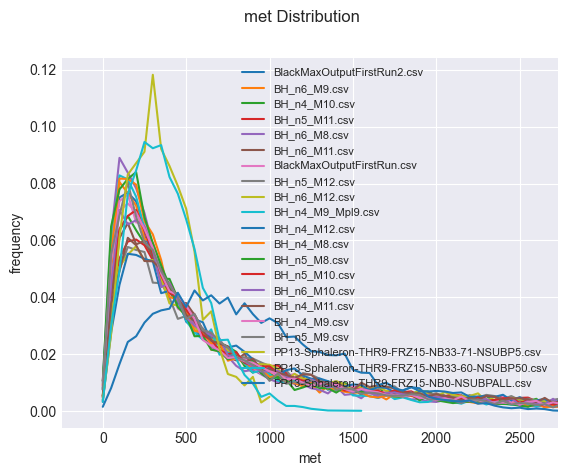

         met       HT  stuff_amount    ptmax  phi_diff
0     605.32  4957.84             7  1997.22  0.714593
1     348.13  7920.83             9  2558.78  2.457185
2     505.24  7811.58             7  2415.97  0.708593
3      64.54  4889.93             6  2205.59  0.227000
4      56.21  6333.05            11  2473.51  2.013593
...      ...      ...           ...      ...       ...
9995  570.84  7533.66             9  2906.29  0.110000
9996  632.91  7784.51             5  3253.94  2.097000
9997  456.51  8206.86             9  2718.84  3.127593
9998  184.21  7302.11             5  3488.34  3.123000
9999  301.96  7912.92            10  3369.74  0.556407

[10000 rows x 5 columns]
          met       HT  stuff_amount    ptmax  phi_diff
0       50.98  7640.48             7  2807.84  1.486593
1      865.63  8149.02            10  2400.83  0.373593
2      602.33  6215.16             4  2424.04  0.386593
3     2428.21  7018.60            10  2428.21  0.000000
4      198.32  3317.23            

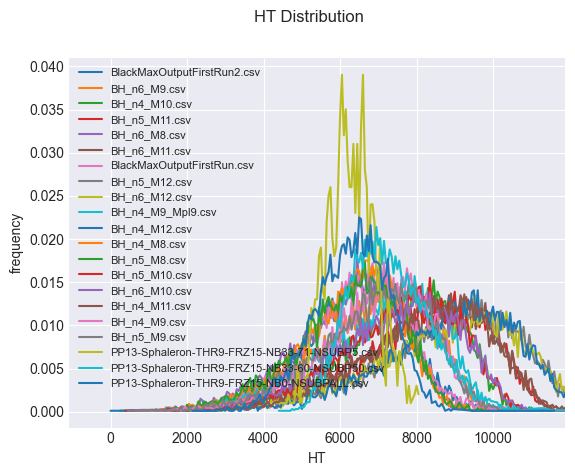

         met       HT  stuff_amount    ptmax  phi_diff
0     605.32  4957.84             7  1997.22  0.714593
1     348.13  7920.83             9  2558.78  2.457185
2     505.24  7811.58             7  2415.97  0.708593
3      64.54  4889.93             6  2205.59  0.227000
4      56.21  6333.05            11  2473.51  2.013593
...      ...      ...           ...      ...       ...
9995  570.84  7533.66             9  2906.29  0.110000
9996  632.91  7784.51             5  3253.94  2.097000
9997  456.51  8206.86             9  2718.84  3.127593
9998  184.21  7302.11             5  3488.34  3.123000
9999  301.96  7912.92            10  3369.74  0.556407

[10000 rows x 5 columns]
          met       HT  stuff_amount    ptmax  phi_diff
0       50.98  7640.48             7  2807.84  1.486593
1      865.63  8149.02            10  2400.83  0.373593
2      602.33  6215.16             4  2424.04  0.386593
3     2428.21  7018.60            10  2428.21  0.000000
4      198.32  3317.23            

In [8]:
plotter(data_variables, data_sample, labels, filter_strengths = [0.95, 0.975, 0.99, 0.95, 1], binsizes = [50, 50, 0.5, 50, 0.2])